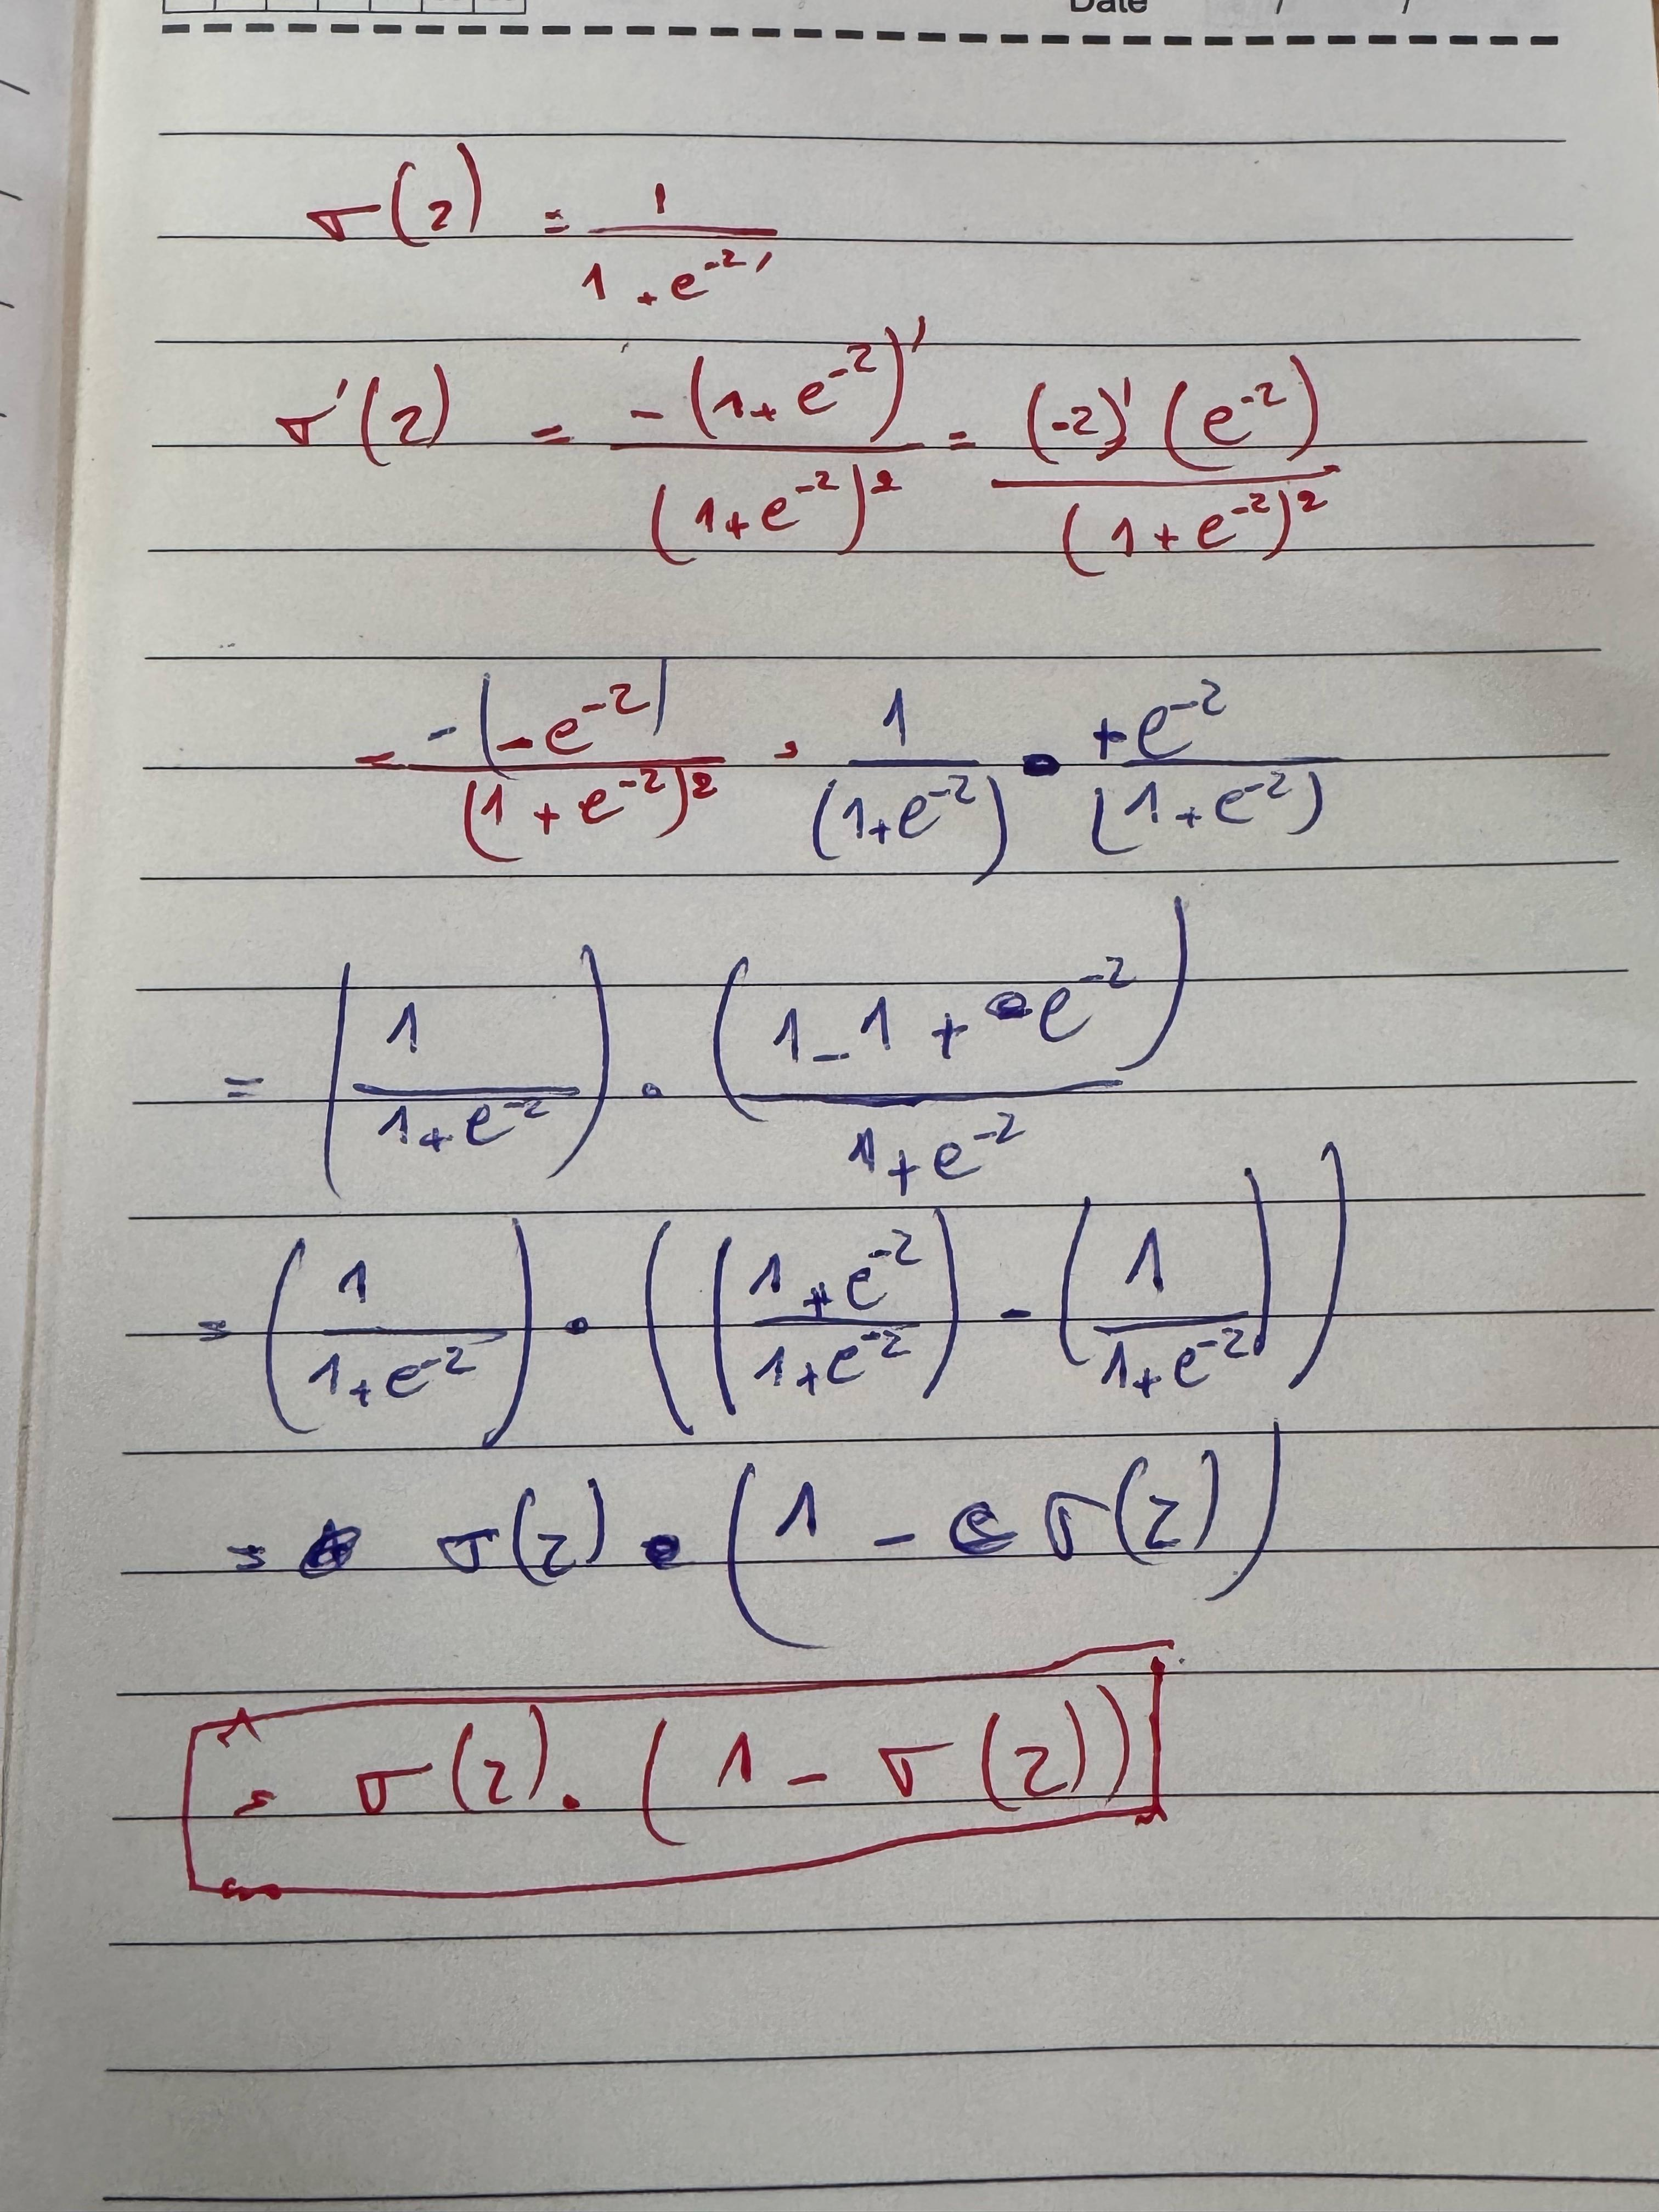

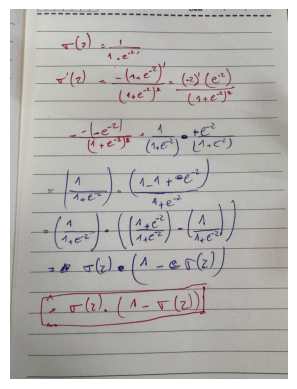

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
image = mpimg.imread('MONTRER.jpg')
# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt

Etape 1 : Definir la fonction d’activation sigmoide et sa derivee

In [13]:
def sigmoid(x):
    result = 1 / (1 + np.exp(-x))  # Formule de la sigmoïde
    assert np.all((result >= 0) & (result <= 1)), "Sigmoïde doit être entre 0 et 1"
    return result

def sigmoid_derivative(x):
    s = sigmoid(x)
    result = s * (1 - s)  # Formule de la dérivée de la sigmoïde
    assert np.all(result >= 0), "Dérivée de la sigmoïde doit être >= 0"
    if np.isscalar(x) and x == 0:
        assert np.isclose(result, 0.25), "Dérivée de la sigmoïde à 0 doit être 0.25"
    return result

# Etapes 2-3-4-5-6 

In [14]:
# Étape 2 : Définir la classe MLP
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, seed=42):
        np.random.seed(seed)
        
        # Initialisation des poids et biais
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
        self.lr = learning_rate

        # Assertions : Vérifier les dimensions
        assert self.W1.shape == (input_size, hidden_size), "Mauvaise dimension pour W1"
        assert self.b1.shape == (1, hidden_size), "Mauvaise dimension pour b1"
        assert self.W2.shape == (hidden_size, output_size), "Mauvaise dimension pour W2"
        assert self.b2.shape == (1, output_size), "Mauvaise dimension pour b2"

    # Étape 3 : Propagation avant
    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)

        # Assertions : Vérifier les dimensions
        assert self.A1.shape == (X.shape[0], self.W1.shape[1]), "Mauvaise dimension pour A1"
        assert self.A2.shape == (X.shape[0], self.W2.shape[1]), "Mauvaise dimension pour A2"
        assert np.all((self.A2 >= 0) & (self.A2 <= 1)), "Sortie A2 doit être entre 0 et 1"

        return self.A2

    # Étape 4 : Calcul de la perte
    def compute_loss(self, y_true, y_pred):
        loss = np.mean((y_true - y_pred) ** 2)  # Formule de la MSE
        assert loss >= 0, "La perte doit être positive ou nulle"
        if np.array_equal(y_true, y_pred):
            assert np.isclose(loss, 0), "La perte doit être 0 si y_true = y_pred"
        return loss/2

    # Étape 5 : Rétropropagation
    def backward(self, X, y, y_pred):
        m = X.shape[0]

        # Gradient de la couche de sortie
        dZ2 = y_pred - y
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        # Gradient de la couche cachée
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * sigmoid_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Assertions : Vérifier les dimensions des gradients
        assert dW1.shape == self.W1.shape, "Mauvaise dimension pour dW1"
        assert db1.shape == self.b1.shape, "Mauvaise dimension pour db1"
        assert dW2.shape == self.W2.shape, "Mauvaise dimension pour dW2"
        assert db2.shape == self.b2.shape, "Mauvaise dimension pour db2"

        # Mise à jour des poids et biais
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    # Étape 6 : Entraînement
    def train(self, X, y, epochs):
        prev_loss = float('inf')
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = self.compute_loss(y, y_pred)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")
            assert loss <= prev_loss or np.isclose(loss, prev_loss), "La perte doit diminuer ou rester stable"
            prev_loss = loss
            self.backward(X, y, y_pred)


 # Etape 7 : Test du modele

In [15]:
# Étape 7 : Test du modèle
if __name__ == "__main__":
    # Données XOR
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    # Création et entraînement du MLP avec un seed
    mlp = MLP(input_size=2, hidden_size=4, output_size=1, learning_rate=2, seed=65842)
    mlp.train(X, y, epochs=65000)

    # Prédictions
    predictions = mlp.forward(X)
    print("\nPrédictions après entraînement :")
    for i in range(len(X)):
        print(f"Entrée : {X[i]}, Prédiction : {predictions[i][0]:.4f}, Attendu : {y[i][0]}")
        if y[i][0] == 0:
            assert predictions[i][0] < 0.5, f"Prédiction pour {X[i]} devrait être < 0.5"
        else:
            assert predictions[i][0] > 0.5, f"Prédiction pour {X[i]} devrait être > 0.5"

Epoch 0, Loss: 0.13404145733653983
Epoch 100, Loss: 0.05821646444664133
Epoch 200, Loss: 0.002490060345871683
Epoch 300, Loss: 0.00037778864454510825
Epoch 400, Loss: 0.00012866506990509848
Epoch 500, Loss: 6.168017931992884e-05
Epoch 600, Loss: 3.545454156889938e-05
Epoch 700, Loss: 2.277844662143714e-05
Epoch 800, Loss: 1.5770900755104646e-05
Epoch 900, Loss: 1.1519916685787658e-05
Epoch 1000, Loss: 8.759673321240215e-06
Epoch 1100, Loss: 6.871926965769126e-06
Epoch 1200, Loss: 5.527013615359114e-06
Epoch 1300, Loss: 4.536670059243044e-06
Epoch 1400, Loss: 3.787295879090685e-06
Epoch 1500, Loss: 3.207171981907441e-06
Epoch 1600, Loss: 2.7492757047162083e-06
Epoch 1700, Loss: 2.3817717505295286e-06
Epoch 1800, Loss: 2.082504799426078e-06
Epoch 1900, Loss: 1.8356827394280996e-06
Epoch 2000, Loss: 1.629810472645033e-06
Epoch 2100, Loss: 1.4563641397845564e-06
Epoch 2200, Loss: 1.308917953407996e-06
Epoch 2300, Loss: 1.1825556359547446e-06
Epoch 2400, Loss: 1.073465382759171e-06
Epoch 25